In [63]:

###  NN 128x128 ###
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread, imshow
import cv2
import os, os.path

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from subprocess import check_output

from PIL import Image, ImageFile

In [8]:
#set train and test directories for desktop local C drive------------------------

#local directory parent folder containing the training folders: type_1, type_2, type_3 and test files
dir_loc = 'C:\\Users\\Jason\\Desktop\\Cervix'
dir_loc_sub = '\\NN128x128'

#local directory parent folder containing the training folders: type_1, type_2, type_3
tr1_dir_loc = dir_loc + dir_loc_sub + '\\train\\Type_1'
tr2_dir_loc = dir_loc + dir_loc_sub + '\\train\\Type_2'
tr3_dir_loc = dir_loc + dir_loc_sub + '\\train\\Type_3'

#local directory parent folder containing the test files
tst1_dir_loc = dir_loc + dir_loc_sub + '\\test'


#files for each training type (1,2,3)
tr1_f_loc = [os.path.join(tr1_dir_loc, f) for f in os.listdir(tr1_dir_loc)]
tr2_f_loc = [os.path.join(tr2_dir_loc, f) for f in os.listdir(tr2_dir_loc)]
tr3_f_loc = [os.path.join(tr3_dir_loc, f) for f in os.listdir(tr3_dir_loc)]

#test image directory
tst1_f_loc = [os.path.join(tst1_dir_loc, f) for f in os.listdir(tst1_dir_loc)]

In [9]:
#NOTE: these are already cropped and resized

#resize type1 files (note: these were already resized once with NN model)

# from PIL import Image, ImageFile
# import os, sys

# # this operations to resize files was alreay performed and saved locally
# # so doesn't need to be run again

# ImageFile.LOAD_TRUNCATED_IMAGES = True

path1 = tr1_dir_loc + "\\"
dirs = os.listdir( path1 )
final_size = 128;

def resize_aspect_fit():
    for item in dirs:
        if item == '.DS_Store':
            continue
        if os.path.isfile(path1+item):
            im = Image.open(path1+item)
            f, e = os.path.splitext(path1+item)
            size = im.size
            ratio = float(final_size) / max(size)
            new_image_size = tuple([int(x*ratio) for x in size])
            im = im.resize(new_image_size, Image.ANTIALIAS)
            new_im = Image.new("RGB", (final_size, final_size))
            new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
            new_im.save(f + '.jpg', 'JPEG', quality=95)
resize_aspect_fit()

In [10]:
#NOTE: these are already cropped and resized

#resize type2 files  (note: these were already resized once with NN model)

#this operations to resize files was alreay performed and saved locally
#so doesn't need to be run again

path2 = tr2_dir_loc + "\\"
dirs = os.listdir( path2 )
final_size = 128;

def resize_aspect_fit():
    for item in dirs:
        if item == '.DS_Store':
            continue
        if os.path.isfile(path2+item):
            im = Image.open(path2+item)
            f, e = os.path.splitext(path2+item)
            size = im.size
            ratio = float(final_size) / max(size)
            new_image_size = tuple([int(x*ratio) for x in size])
            im = im.resize(new_image_size, Image.ANTIALIAS)
            new_im = Image.new("RGB", (final_size, final_size))
            new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
            new_im.save(f + '.jpg', 'JPEG', quality=95)
resize_aspect_fit()

In [11]:
#NOTE: these are already cropped and resized

#resize type3 files (note: these were already resized once with NN model)

#this operations to resize files was alreay performed and saved locally
#so doesn't need to be run again

path3 = tr3_dir_loc + "\\"
dirs = os.listdir( path3 )
final_size = 128;

def resize_aspect_fit():
    for item in dirs:
        if item == '.DS_Store':
            continue
        if os.path.isfile(path3+item):
            im = Image.open(path3+item)
            f, e = os.path.splitext(path3+item)
            size = im.size
            ratio = float(final_size) / max(size)
            new_image_size = tuple([int(x*ratio) for x in size])
            im = im.resize(new_image_size, Image.ANTIALIAS)
            new_im = Image.new("RGB", (final_size, final_size))
            new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
            new_im.save(f + '.jpg', 'JPEG', quality=95)
resize_aspect_fit()

In [12]:
#NOTE: these are already cropped and resized

#resize test files (note: these were already resized once with NN model)

#this operations to resize files was alreay performed and saved locally
#so doesn't need to be run again

path4 = tst1_dir_loc + "\\"
dirs = os.listdir( path4 )
final_size = 128;

def resize_aspect_fit():
    for item in dirs:
        if item == '.DS_Store':
            continue
        if os.path.isfile(path4+item):
            im = Image.open(path4+item)
            f, e = os.path.splitext(path4+item)
            size = im.size
            ratio = float(final_size) / max(size)
            new_image_size = tuple([int(x*ratio) for x in size])
            im = im.resize(new_image_size, Image.ANTIALIAS)
            new_im = Image.new("RGB", (final_size, final_size))
            new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
            new_im.save(f + '.jpg', 'JPEG', quality=95)
resize_aspect_fit()

(4160, 3120, 3)


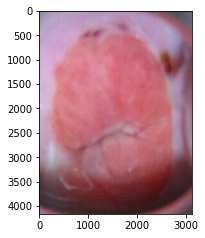

In [13]:
#compare original image with scaled and cropped image

import imageio

testImage = imageio.imread("C:\\Users\\Jason\\Desktop\\Cervix backup files\\train\\Type_1\\2.jpg")

testImageGray = testImage[:,:,0]

plt.figure()
plt.gray()

plt.subplot(121)
plt.imshow(testImage)

print(testImage.shape)

(128, 128, 3)


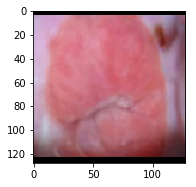

In [14]:
#cropped and re-sized image
testImage1 = imageio.imread("C:\\Users\\Jason\\Desktop\\Cervix\\NN128x128\\train\\Type_1\\2.jpg")

plt.figure()

plt.subplot(121)
plt.imshow(testImage1)

print(testImage1.shape)

(128, 128)


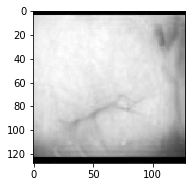

In [15]:
#cropped and resized grey image
testImageGray1 = testImage1[:,:,0]

plt.subplot(121)
plt.imshow(testImageGray1)

print (testImageGray1.shape)

In [16]:
#######################################################
#
#
#      Read Images into Python 
#
#
#######################################################
from subprocess import check_output

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image

from time import time
from time import sleep

import pandas as pd
import scipy.misc

import matplotlib.pyplot as plt 

In [17]:
#re-set the files because they have been resized
#files for each training type (1,2,3)
tr1_f_loc = [os.path.join(tr1_dir_loc, f) for f in os.listdir(tr1_dir_loc)]
tr2_f_loc = [os.path.join(tr2_dir_loc, f) for f in os.listdir(tr2_dir_loc)]
tr3_f_loc = [os.path.join(tr3_dir_loc, f) for f in os.listdir(tr3_dir_loc)]

#test image directory
tst1_f_loc = [os.path.join(tst1_dir_loc, f) for f in os.listdir(tst1_dir_loc)]

In [19]:
#get path for all files in the local C: Type1 folder, then split to see file type and cervix type

#tr1_f_loc = [os.path.join(tr_t1, f) for f in os.listdir(tr_t1)]
tr1_im_loc = pd.DataFrame({"imagepath": tr1_f_loc})
tr1_im_loc["filetype"] = tr1_im_loc.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tr1_im_loc["type"] = tr1_im_loc.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tr1_im_loc["name"] = tr1_im_loc.apply(lambda row: row.imagepath.split("\\")[8], axis=1)
tr1_im_loc.head()

# a=imageio.imread('C:\\Users\\Jason\Desktop\\Cervix\\train\\Type_1\\1013resCroppedres.jpg')
# plt.imshow(a)

,imagepath,filetype,type,name
0,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_1,10.jpg
1,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_1,1013.jpg
2,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_1,1014.jpg
3,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_1,1019.jpg
4,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_1,102.jpg


In [20]:
# a=imageio.imread('C:\\Users\\Jason\Desktop\\Cervix\\train\\Type_1\\1013resCroppedres.jpg')
# plt.imshow(a)

#create ylab1

y1 = tr1_im_loc['type']
len(y1)

751

In [21]:
#get path for all files in the local C: Type2 folder, then split to see file type and cervix type

tr2_im_loc = pd.DataFrame({"imagepath": tr2_f_loc})
tr2_im_loc["filetype"] = tr2_im_loc.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tr2_im_loc["type"] = tr2_im_loc.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tr2_im_loc["name"] = tr2_im_loc.apply(lambda row: row.imagepath.split("\\")[8], axis=1)
tr2_im_loc.head()


,imagepath,filetype,type,name
0,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_2,1.jpg
1,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_2,100.jpg
2,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_2,1001.jpg
3,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_2,1002.jpg
4,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_2,1005.jpg


In [22]:
# a=imageio.imread('C:\\Users\\Jason\Desktop\\Cervix\\train\\Type_2\\1001resCroppedres.jpg')
# plt.imshow(a)

#create ylab2

y2 = tr2_im_loc['type']
len(y2)

761

In [23]:
#get path for all files in the local C: Type3 folder, then split to see file type and cervix type

tr3_im_loc = pd.DataFrame({"imagepath": tr3_f_loc})
tr3_im_loc["filetype"] = tr3_im_loc.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tr3_im_loc["type"] = tr3_im_loc.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tr3_im_loc["name"] = tr3_im_loc.apply(lambda row: row.imagepath.split("\\")[8], axis=1)
tr3_im_loc.head()


,imagepath,filetype,type,name
0,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_3,100.jpg
1,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_3,1000.jpg
2,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_3,1003.jpg
3,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_3,1004.jpg
4,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_3,1007.jpg


In [24]:
# a=imageio.imread('C:\\Users\\Jason\Desktop\\Cervix\\train\\Type_3\\1000resCroppedres.jpg')
# plt.imshow(a)

#create ylab3

y3 = tr3_im_loc['type']
len(y3)

776

In [26]:
#get path for all files in the local C: Test folder, then split to see file type and cervix type

tst1_im_loc = pd.DataFrame({"imagepath": tst1_f_loc})
tst1_im_loc["filetype"] = tst1_im_loc.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tst1_im_loc["type"] = tst1_im_loc.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tst1_im_loc["name"] = tst1_im_loc.apply(lambda row: row.imagepath.split("\\")[7], axis=1)
tst1_im_loc.head()


,imagepath,filetype,type,name
0,C:\Users\Jason\Desktop\Cervix\NN128x128\test\0...,jpg,test,0.jpg
1,C:\Users\Jason\Desktop\Cervix\NN128x128\test\1...,jpg,test,1.jpg
2,C:\Users\Jason\Desktop\Cervix\NN128x128\test\1...,jpg,test,10.jpg
3,C:\Users\Jason\Desktop\Cervix\NN128x128\test\1...,jpg,test,100.jpg
4,C:\Users\Jason\Desktop\Cervix\NN128x128\test\1...,jpg,test,10000.jpg


In [28]:
# a=imageio.imread('C:\\Users\\Jason\Desktop\\Cervix\\test\\0resCroppedres.jpg')
# plt.imshow(a)

#get the name of the images for testing
tst_name = tst1_im_loc['name']
len(tst_name), len(tst1_im_loc), tst1_im_loc[0:2]

(4018,
 4018,
                                            imagepath filetype  type   name
 0  C:\Users\Jason\Desktop\Cervix\NN128x128\test\0...      jpg  test  0.jpg
 1  C:\Users\Jason\Desktop\Cervix\NN128x128\test\1...      jpg  test  1.jpg)

In [30]:
#combine all data frames together

tr_all_loc = tr1_im_loc.append(tr2_im_loc)
tr_all_loc = tr_all_loc.append(tr3_im_loc)

tr_all_loc = tr_all_loc.reset_index(drop=True)

tr_all_loc.head()

,imagepath,filetype,type,name
0,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_1,10.jpg
1,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_1,1013.jpg
2,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_1,1014.jpg
3,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_1,1019.jpg
4,C:\Users\Jason\Desktop\Cervix\NN128x128\train\...,jpg,Type_1,102.jpg


In [31]:
#check to make sure all files appended from each folder
len(tr_all_loc), len(tr1_im_loc) + len(tr2_im_loc) + len(tr3_im_loc)

(2288, 2288)

In [32]:
#combine all ylabels together
type_all = y1.append(y2)
type_all = type_all.append(y3)
type_all = type_all.reset_index(drop=True)
len(type_all), type_all.head(), type_all.tail()

(2288, 0    Type_1
 1    Type_1
 2    Type_1
 3    Type_1
 4    Type_1
 Name: type, dtype: object, 2283    Type_3
 2284    Type_3
 2285    Type_3
 2286    Type_3
 2287    Type_3
 Name: type, dtype: object)

In [33]:
import cv2

arr_images_gr = []        

for image in tr_all_loc["imagepath"]:
    arr_images_gr.append(cv2.imread(image, cv2.IMREAD_GRAYSCALE))

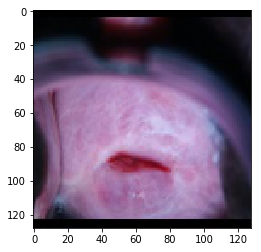

In [36]:
a=imageio.imread('C:\\Users\\Jason\Desktop\\Cervix\\NN128x128\\train\\Type_1\\10.jpg')
plt.imshow(a)



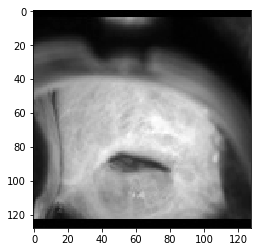

In [35]:
plt.imshow(arr_images_gr[0])

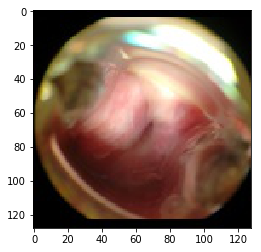

In [37]:
a=imageio.imread('C:\\Users\\Jason\Desktop\\Cervix\\NN128x128\\train\\Type_3\\996.jpg')
plt.imshow(a)


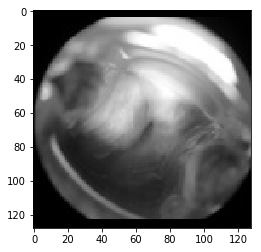

In [38]:
plt.imshow(arr_images_gr[2287])

In [39]:
#convert all test images in the combined data frame to gray scale npy array

arr_images_tst_gr = []        

for image in tst1_im_loc["imagepath"]:
    arr_images_tst_gr.append(cv2.imread(image, cv2.IMREAD_GRAYSCALE))

In [42]:
len(arr_images_tst_gr), len(tst_name), tst_name[0:4], tst_name[4015:4017]

(4018, 4018, 0      0.jpg
 1      1.jpg
 2     10.jpg
 3    100.jpg
 Name: name, dtype: object, 4015    97.jpg
 4016    98.jpg
 Name: name, dtype: object)

In [46]:
#save the training files and the y variable to numpy arrays

import numpy as np

np.save("NN2_array_file_gray_128", arr_images_gr)
np.save("NN2_y_train_types_128", type_all)

#save the testfile to numpy arrays
np.save("NN2_array_file_tst_gray_128", arr_images_tst_gr)
np.save("NN2_test_filenames_128", tst_name)


In [ ]:
########################################################################
#
#
#          NN 128
#
#
########################################################################

In [65]:
#load gray npy array
tr_im_in = np.load('NN2_array_file_gray_128.npy')
tr_lab_in = np.load('NN2_y_train_types_128.npy')

tst_im_in = np.load('NN2_array_file_tst_gray_128.npy')
tst_image_name = np.load('NN2_test_filenames_128.npy')


len(tr_im_in), tr_im_in.shape, len(tr_lab_in), tr_lab_in.shape, len(tst_im_in), len(tst_image_name)

(2288, (2288, 128, 128), 2288, (2288,), 4018, 4018)

In [83]:
#y_lab = tr_lab_in.replace(["Type_1", "Type_2", "Type_3"], [0,1,2]).astype('category')

In [66]:
#combine the labels and the images in one data frame

train_data_df = pd.DataFrame({'label': tr_lab_in, 'images': list(tr_im_in)}, columns=['label', 'images'])

#shape of data frame
train_data_df.shape, train_data_df['images'].shape, train_data_df['label'].shape

((2288, 2), (2288,), (2288,))

In [67]:
#parition df to separate the labels from image data
data=train_data_df['images']
label=train_data_df['label']

#chek shape
data.shape, label.shape

((2288,), (2288,))

In [68]:
#change Type_1, Type_2, Type_3 to 1,2,3
label = label.replace(["Type_1", "Type_2", "Type_3"],[0,1,2]).astype('category')

In [69]:
label.shape, label[0:4], label[1500:1503], label[2285:2288]

((2288,), 0    0
 1    0
 2    0
 3    0
 Name: label, dtype: category
 Categories (3, int64): [0, 1, 2], 1500    1
 1501    1
 1502    1
 Name: label, dtype: category
 Categories (3, int64): [0, 1, 2], 2285    2
 2286    2
 2287    2
 Name: label, dtype: category
 Categories (3, int64): [0, 1, 2])

In [70]:
#separate the df into train and validation set

from sklearn.model_selection import train_test_split

train_data, val_data, train_label, val_label = train_test_split(data, label, test_size=0.2, random_state=123 )

#check length to verify correct partition size
len(train_data), len(val_data), len(train_label), len(val_label)

(1830, 458, 1830, 458)

In [71]:
#return partitioned df back to array
train_data = np.array(train_data.tolist())
val_data = np.array(val_data.tolist())

train_label = np.array(train_label.tolist())
val_label = np.array(val_label.tolist())



#this will turn the image data to an array from original df: train_data_df['images'].  
#not used here
#train_data = np.array(train_data_df['images'].tolist())


#check shape
print ('Training data shape: ', train_data.shape, train_label.shape)
print ('Validation data shape: ', val_data.shape, val_label.shape)

classes = np.unique(train_label)
nClasses = len(classes)

print ('Total number of outputs: ', nClasses)
print ('Output classes: ', classes)

Training data shape:  (1830, 128, 128) (1830,)
Validation data shape:  (458, 128, 128) (458,)
Total number of outputs:  3
Output classes:  [0 1 2]


In [72]:
#resize to be able to feed into CNN
from numpy import array
train_data = train_data.reshape(1830, 128, 128, 1)
train_label = train_label.reshape(1830, 1)

val_data = val_data.reshape(458, 128, 128, 1)
val_label = val_label.reshape(458, 1)

#check shape after re-size
print ('Training data shape: ', train_data.shape, train_label.shape)
print ('Validation data shape: ', val_data.shape, val_label.shape)

classes = np.unique(train_label)
nClasses = len(classes)

print ('Total number of outputs: ', nClasses)
print ('Output classes: ', classes)

Training data shape:  (1830, 128, 128, 1) (1830, 1)
Validation data shape:  (458, 128, 128, 1) (458, 1)
Total number of outputs:  3
Output classes:  [0 1 2]


In [73]:
#find shape of the image data and create variable for the input shape

nRows, nCols, nDims = train_data.shape[1:]
train_data = train_data.reshape(train_data.shape[0], nRows, nCols, nDims)
val_data = val_data.reshape(val_data.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

In [74]:
#change to float data type
train_data = train_data.astype('float32')
val_data = val_data.astype('float32')

In [75]:
#scale data to be between 0 and 1
train_data /= 255
val_data /= 255

In [76]:
train_label[0]

array([1])

In [77]:
from keras.utils import to_categorical

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_label)
val_labels_one_hot = to_categorical(val_label)

# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_label[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [1]
After conversion to categorical ( one-hot ) :  [0. 1. 0.]


In [78]:
#code from: https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/

#setup the network
from sklearn.manifold import TSNE

#other activation functions: sigmoid, tanh, K.tanh
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
 
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='sigmoid'))
    model.add(Conv2D(64, (3, 3), activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [80]:
#training the network

model1 = createModel()
batch_size = 100
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(val_data, val_labels_one_hot))

Train on 1830 samples, validate on 458 samples
Epoch 1/100
1830/1830 [==============================] - 111s 61ms/step - loss: 9.9834 - acc: 0.3355 - val_loss: 10.5225 - val_acc: 0.3472
Epoch 2/100
1830/1830 [==============================] - 111s 61ms/step - loss: 9.4635 - acc: 0.3317 - val_loss: 1.1147 - val_acc: 0.2991
Epoch 3/100
1830/1830 [==============================] - 111s 61ms/step - loss: 1.1045 - acc: 0.3246 - val_loss: 1.1030 - val_acc: 0.2991
Epoch 4/100
1830/1830 [==============================] - 111s 61ms/step - loss: 1.1011 - acc: 0.3311 - val_loss: 1.1005 - val_acc: 0.3472
Epoch 5/100
1830/1830 [==============================] - 111s 61ms/step - loss: 1.1007 - acc: 0.3219 - val_loss: 1.1001 - val_acc: 0.2991
Epoch 6/100
1830/1830 [==============================] - 111s 61ms/step - loss: 1.0995 - acc: 0.3393 - val_loss: 1.0999 - val_acc: 0.3472
Epoch 7/100
1830/1830 [==============================] - 111s 61ms/step - loss: 1.0997 - acc: 0.3344 - val_loss: 1.0981 - va

1830/1830 [==============================] - 111s 61ms/step - loss: 0.6620 - acc: 0.7066 - val_loss: 1.3632 - val_acc: 0.4039
Epoch 60/100
1830/1830 [==============================] - 111s 61ms/step - loss: 0.6299 - acc: 0.7180 - val_loss: 1.4002 - val_acc: 0.3908
Epoch 61/100
1830/1830 [==============================] - 111s 61ms/step - loss: 0.5806 - acc: 0.7519 - val_loss: 1.8201 - val_acc: 0.4541
Epoch 62/100
1830/1830 [==============================] - 112s 61ms/step - loss: 0.5756 - acc: 0.7470 - val_loss: 1.4635 - val_acc: 0.4389
Epoch 63/100
1830/1830 [==============================] - 111s 61ms/step - loss: 0.5477 - acc: 0.7612 - val_loss: 1.5572 - val_acc: 0.4258
Epoch 64/100
1830/1830 [==============================] - 111s 61ms/step - loss: 0.5147 - acc: 0.7803 - val_loss: 1.5311 - val_acc: 0.4389
Epoch 65/100
1830/1830 [==============================] - 112s 61ms/step - loss: 0.4604 - acc: 0.7978 - val_loss: 1.5972 - val_acc: 0.4148
Epoch 66/100
1830/1830 [================

In [81]:
#evaluate the model on the validation set
model1.evaluate(val_data, val_labels_one_hot)


#evaluate model on test data
#model1.evaluate(test_data, test_label)

458/458 [==============================] - 9s 19ms/step


[3.307390885582137, 0.4759825328812328]

Text(0.5,1,'Loss Curves')

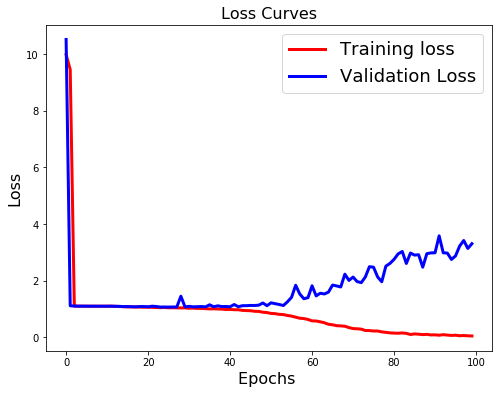

In [82]:
# Loss Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


Text(0.5,1,'Accuracy Curves')

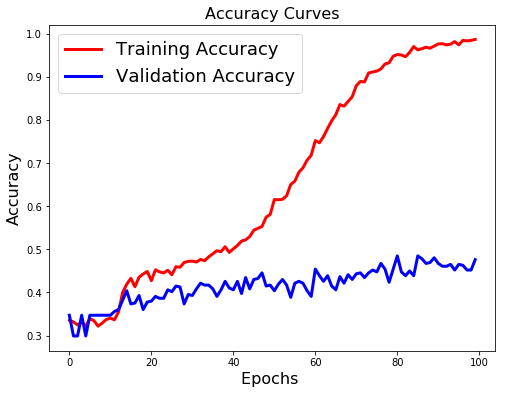

In [83]:
# Accuracy Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)